#### > Import library : 

In [1]:
## for data
import numpy as np
import pandas as pd
import os

## for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar


import warnings
warnings.filterwarnings("ignore")

C:\Users\paras\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\paras\miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\paras\miniconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [15]:
# pip install soccerplots

In [2]:
# Importing the dataset
for dirname, _, filenames in os.walk('..\Footbal_Data_Analysis\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


..\Footbal_Data_Analysis\input\fixtures.csv
..\Footbal_Data_Analysis\input\odds.csv
..\Footbal_Data_Analysis\input\players.csv
..\Footbal_Data_Analysis\input\PythiaDataTask2021.pdf
..\Footbal_Data_Analysis\input\results.csv
..\Footbal_Data_Analysis\input\startingXI.csv
..\Footbal_Data_Analysis\input\teams.csv


In [3]:
# Importing the dataset
teams = pd.read_csv('input/teams.csv').set_index('TeamID')
results = pd.read_csv('input/results.csv')#.set_index('building_id')
fixtures=pd.read_csv('input/fixtures.csv')
odds = pd.read_csv('input/odds.csv')
players = pd.read_csv('input/players.csv')
players_name = pd.read_csv('input/startingXI.csv')

## Let's See a very detailed league table for season 1

In [4]:
mask=results['SeasonID'] == 1
resultsS1 = results[mask]
resultsS2 = results[~mask]
Weeks = max(resultsS1['Gameweek'])
Number_teams = len(teams)
winning_team = []
diffgoals = []
HW = []
AW = []
D = []
for i in range(len(resultsS1)):
    if(resultsS1['HomeScore'][i] > resultsS1['AwayScore'][i]):
        winning_team.append('Home')
        HW.append(1)
        AW.append(0)
        D.append(0)
    elif(resultsS1['HomeScore'][i] < resultsS1['AwayScore'][i]):
        winning_team.append('Away')
        HW.append(0)
        AW.append(1)
        D.append(0)
    else:
        winning_team.append('Draw')
        HW.append(0)
        AW.append(0)
        D.append(1)
    diffgoals.append((resultsS1['HomeScore'][i])-(resultsS1['AwayScore'][i]))
resultsS1['Winning Team'] = winning_team
resultsS1['diffgoals'] = diffgoals
resultsS1['HW'] = HW
resultsS1['AW'] = AW
resultsS1['D'] = D


In [5]:
def total_goals(team):
    """Total goals for a given team for the season1."""
    return resultsS1[resultsS1["HomeTeamID"] == team].sum()["HomeScore"] + \
           resultsS1[resultsS1["AwayTeamID"] == team].sum()["AwayScore"]

def total_recievegoals(team):
    """Total Goal recieved for a given team for the season1."""
    return resultsS1[resultsS1["HomeTeamID"] == team].sum()["AwayScore"] + \
           resultsS1[resultsS1["AwayTeamID"] == team].sum()["HomeScore"]

def diffgoals(team):
    """diff goal for a given team."""
    return total_goals(team)-total_recievegoals(team)


def winnings(team):
    """Total wins for a given team for the season1."""
    return resultsS1[resultsS1["HomeTeamID"] == team].sum()["HW"] + \
           resultsS1[resultsS1["AwayTeamID"] == team].sum()["AW"]

def losses(team):
    """Total losts for a given team for the season1."""
    return resultsS1[resultsS1["HomeTeamID"] == team].sum()["AW"] + \
           resultsS1[resultsS1["AwayTeamID"] == team].sum()["HW"]

def draws(team):
    """Total draws for a given team for the season1."""
    return resultsS1[resultsS1["HomeTeamID"] == team].sum()["D"] + \
           resultsS1[resultsS1["AwayTeamID"] == team].sum()["D"]

def points(team):
    """Total points for a given team for theseason1."""
    return (winnings(team)*3) + (losses(team)*0) + (draws(team)*1)

def total_shots(team):
    """Total shots for a given team for the season1."""
    return resultsS1[resultsS1["HomeTeamID"] == team].sum()["HomeShots"] + \
           resultsS1[resultsS1["AwayTeamID"] == team].sum()["AwayShots"]

def shots_against(team):
    """Total shots against a given team for the season1."""
    return resultsS1[resultsS1["HomeTeamID"] == team].sum()["AwayShots"] + \
           resultsS1[resultsS1["AwayTeamID"] == team].sum()["HomeShots"]

def ratio(team):
    """Conversion rate for a given team."""
    return (total_goals(team)/total_shots(team))*100


In [6]:
league_table_detailed = teams.copy()
Shots = [] 
ShotsAgainst = [] 
Goalratio = []
Wins = []
Losses = []
Draws = []
Points = []
GF = []
GA = []
GD = []
for i in range(1, Number_teams+1):
    Wins.append(winnings(i))
    Losses.append(losses(i))
    Draws.append(draws(i))
    Points.append(points(i))
    GD.append(diffgoals(i))
    GA.append(total_recievegoals(i))
    GF.append(total_goals(i))
    Shots.append(total_shots(i))
    ShotsAgainst.append(shots_against(i))
    Goalratio.append(ratio(i))
    
league_table_detailed['Points'] = Points    
league_table_detailed['Wins'] = Wins
league_table_detailed['Losses'] = Losses
league_table_detailed['Draws'] = Draws
league_table_detailed['GD'] = GD
league_table_detailed['GF'] = GF
league_table_detailed['GA'] = GA
league_table_detailed['Goalratio'] = Goalratio        
league_table_detailed['Shots For'] = Shots    
league_table_detailed['ShotsAgainst'] = ShotsAgainst
league_table_detailed = league_table_detailed.sort_values(by=['Points'], ascending = False)
league_table_detailed['Position'] = range(1,29)
league_table_detailed = league_table_detailed.set_index('Position')
league_table_detailed

,TeamName,Points,Wins,Losses,Draws,GD,GF,GA,Goalratio,Shots For,ShotsAgainst
Position,,,,,,,,,,,
1,Miami,138,44,4,6,118,159,41,13.118812,1212,480
2,Cincinnati,125,39,7,8,79,130,51,12.536162,1037,455
3,Baltimore,117,35,7,12,95,136,41,14.422057,943,501
4,New York S,113,34,9,11,56,108,52,11.625404,929,532
5,Boston,106,31,10,13,72,130,58,12.732615,1021,518
6,Seattle,105,31,11,12,54,118,64,12.660944,932,515
7,Chicago B,105,32,13,9,54,110,56,12.614679,872,538
8,Oakland,96,27,12,15,32,98,66,13.014608,753,682
9,Chicago H,95,28,15,11,22,97,75,12.201258,795,629


## Let's see some visualisation for our detailed league table

### 1) The Goals : 

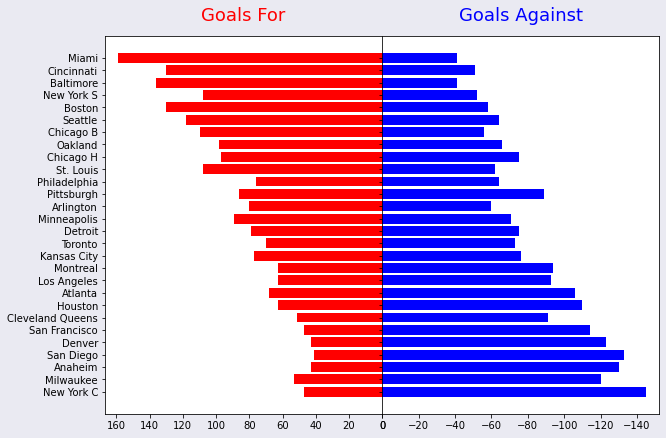

In [7]:
Goals=league_table_detailed[['TeamName','GA', 'GF']]
Goals.set_index('TeamName', inplace=True)
Goals['GA'] = Goals['GA'].astype(float)
Goals['GA'] = Goals['GA'] * (-1)
##############
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
fig, axes = plt.subplots(figsize=(10,7), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(Goals.index, Goals['GF'], align='center', color='r')
axes[0].set_title('Goals For', fontsize=18, pad=15, color='r')
axes[1].barh(Goals.index, Goals['GA'], align='center', color='b')
axes[1].set_title('Goals Against', fontsize=18, pad=15, color='b')
axes[0].invert_xaxis() 
axes[1].invert_xaxis() 
plt.gca().invert_yaxis()    
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

    


### 2) The Shots : 

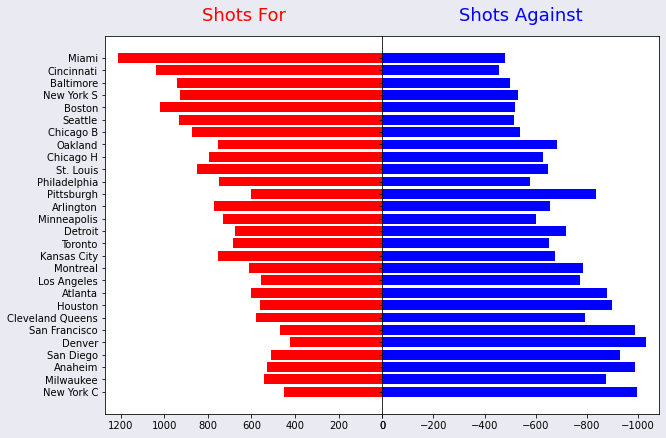

In [8]:
Shots=league_table_detailed[['TeamName','Shots For', 'ShotsAgainst']]
Shots.set_index('TeamName', inplace=True)
Shots['ShotsAgainst'] = Shots['ShotsAgainst'].astype(float)
Shots['ShotsAgainst'] = Shots['ShotsAgainst'] * (-1)
##############
facecolor = '#eaeaf2'

fig, axes = plt.subplots(figsize=(10,7), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(Shots.index, Shots['Shots For'], align='center', color='r')
axes[0].set_title('Shots For', fontsize=18, pad=15, color='r')
axes[1].barh(Shots.index, Shots['ShotsAgainst'], align='center', color='b')
axes[1].set_title('Shots Against', fontsize=18, pad=15, color='b')
    
axes[0].invert_xaxis() 
axes[1].invert_xaxis() 
plt.gca().invert_yaxis()    
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)



### 3) The Goals rating : 

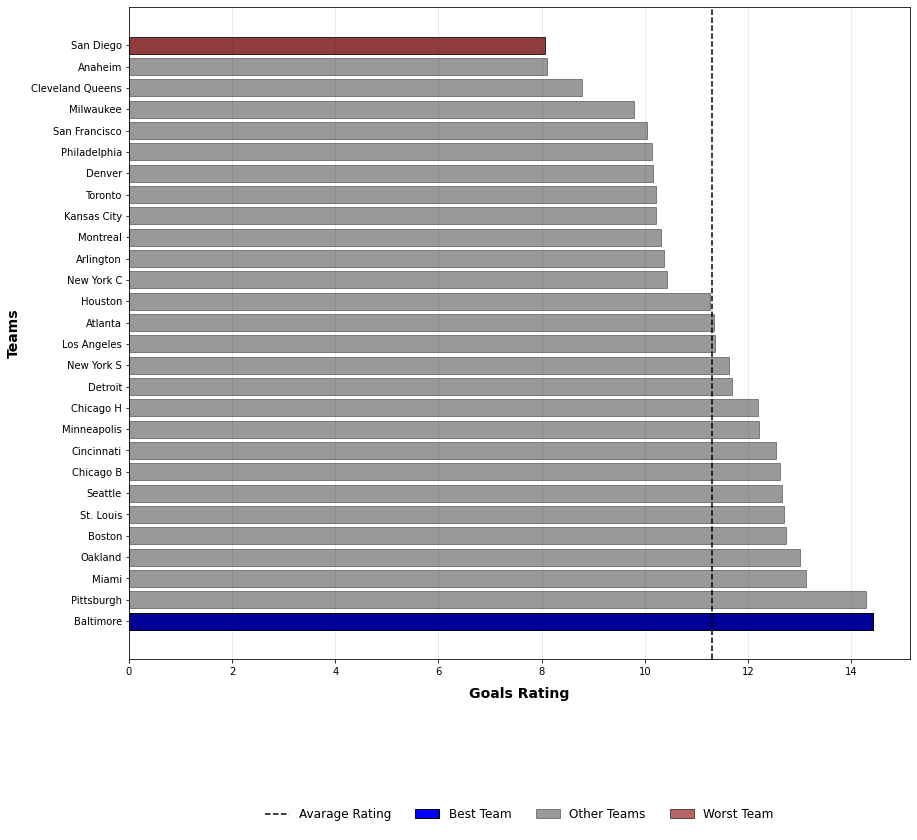

In [9]:
sorted_data = league_table_detailed.sort_values(by="Goalratio",ascending=False)
sorted_data.reset_index(inplace=True)
ratio_top = sorted_data.iloc[0:1]
ratio_bot = sorted_data.iloc[-1]
mean_ratio= sorted_data['Goalratio'].mean()
epl_idx = list(sorted_data.index + 1)

fig, ax = plt.subplots(figsize=(14,12))

bars0 = ax.barh(ratio_top['TeamName'], ratio_top['Goalratio'], color='b', edgecolor='black')
bars1 = ax.barh(sorted_data['TeamName'], sorted_data['Goalratio'], color='black', alpha=0.4, edgecolor='black')
bars2 = ax.barh(ratio_bot['TeamName'], ratio_bot['Goalratio'], color="darkred", alpha=0.6, edgecolor='black')
line  = ax.axvline(mean_ratio, linestyle='--', color='black')

ax.legend(["Avarage Rating", "Best Team", "Other Teams" ,"Worst Team"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Goals Rating", fontsize=14, labelpad=10, fontweight='bold')
ax.set_ylabel("Teams", fontsize=14, labelpad=10, fontweight='bold')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

## How playing home helps

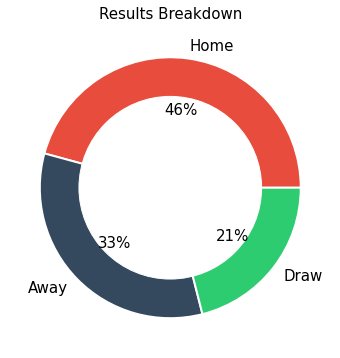

In [10]:
df=resultsS1.copy()
colors = ["#e74c3c", "#34495e", "#2ecc71"]
colors1 = sns.color_palette("hls",3)
plt.figure(figsize=(6,6))
df["Winning Team"].value_counts().plot.pie(autopct = "%1.0f%%",
                                  colors = colors,
                                  wedgeprops = {"linewidth":2,"edgecolor":"white"},
                                  textprops = {"fontsize": 15})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("Results Breakdown", fontsize = 15)
plt.ylabel("");

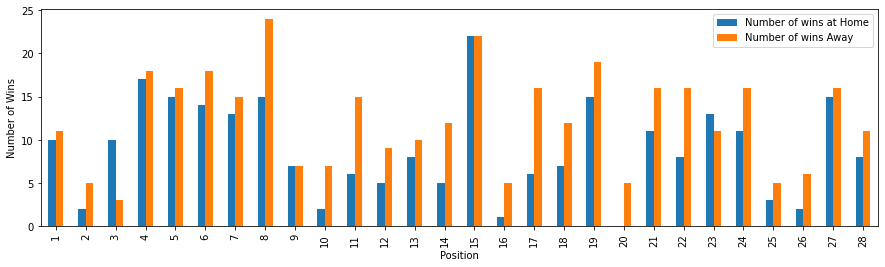

In [11]:
def WininHome(team):
    """Total shots for a given team for the whole dataset."""
    return resultsS1[resultsS1["HomeTeamID"] == team].sum()["HW"] 
def WininAway(team):
    """Total shots for a given team for the whole dataset."""
    return resultsS1[resultsS1["AwayTeamID"] == team].sum()["AW"] 
WH = []
WA = []
for i in range(1, Number_teams+1):
    WH.append(WininHome(i))
    WA.append(WininAway(i))
    
league_table_detailed['Win Home'] = WH
league_table_detailed['Win Away'] = WA

league_table_detailed[['Win Away','Win Home']].plot.bar(figsize=(15,4))
plt.xticks(rotation=90);
plt.ylabel("Number of Wins")
plt.legend(['Number of wins at Home', 'Number of wins Away'])


In [12]:
print(' {} teams had more wins at home than away ; just {}  teams won more away from home than they were playing at home '.format(sum(league_table_detailed['Win Home'] >league_table_detailed['Win Away']) , sum(league_table_detailed['Win Home'] <league_table_detailed['Win Away'])))

 24 teams had more wins at home than away ; just 2  teams won more away from home than they were playing at home 


### Not neccecerly the team with best goal forward or against positioned best. This even get worse in case of the number of shots -- Of course the trend is there in general

<AxesSubplot:xlabel='Position'>

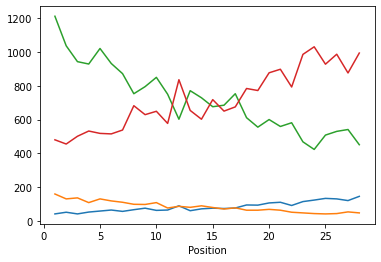

In [13]:
league_table_detailed['GA'].plot.line()  
league_table_detailed['GF'].plot.line() 
league_table_detailed['Shots For'].plot.line()  
league_table_detailed['ShotsAgainst'].plot.line()  


### Let's see more in details and compare different parameters for the Hero and the worst team

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


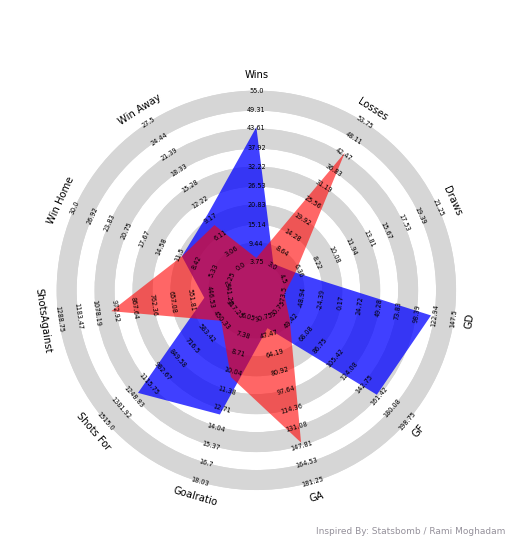

In [14]:
params = list(league_table_detailed.columns)
params = params[2:]
Teams = league_table_detailed[(league_table_detailed.TeamName == "Miami") | (league_table_detailed.TeamName =="New York C")].reset_index(drop=True)
#add ranges to list of tuple pairs
ranges = []
values1  = []
values2  = []

for x in params:
    a = min(league_table_detailed[params][x])
    a = a - (a*.25)
    
    b = max(league_table_detailed[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(0,2):
    if Teams['TeamName'][x] == 'Miami':
        values1 = Teams.iloc[x].values.tolist()
    if Teams['TeamName'][x] == 'New York C':
        values2 = Teams.iloc[x].values.tolist()
        
values1 = values1[2:]
values2 = values2[2:]


values = [values1,values2]
#title 
title = dict(title_name ='Miami',
    subtitle_name = 'Rating = 7.01',
    title_name2 = 'New York C',
    subtitle_name2 = 'Rating = 6.85',
    title_fontsize = 18,
    subtitle_fontsize=15
)
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['blue',"red"],
                        alphas=[.75,.6],
#                         title=title,
                         compare=True)